<a href="https://colab.research.google.com/github/gvpeloi/challange-phyton/blob/main/challange_phyton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


Faturamento Loja 1: R$1.534.509,12
Faturamento Loja 2: R$1.488.459,06
Faturamento Loja 3: R$1.464.025,03
Faturamento Loja 4: R$1.384.497,58


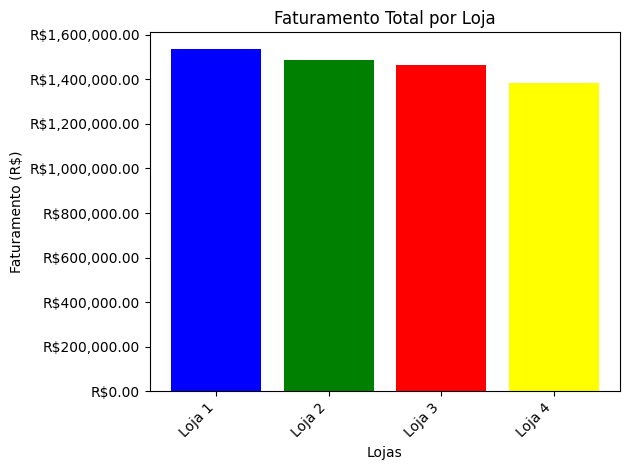

In [ ]:
#calcular o faturamento total de cada loja. Somando os valores da coluna Preço de cada loja para estimar o faturamento


faturamento_loja1 = loja['Preço'].sum()  # Soma todos os valores da coluna 'Preço' do DataFrame 'loja' e armazena o total em 'faturamento_loja1'
faturamento_loja2 = loja2['Preço'].sum() # Soma todos os valores da coluna 'Preço' do DataFrame 'loja2' e armazena o total em 'faturamento_loja2'
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Exibe o faturamento da loja 1 formatado com ponto para milhar e vírgula duas casas decimais
print(f"Faturamento Loja 1: R${faturamento_loja1:,.2f}".replace(',', 'v').replace('.', ',').replace('v', '.'))
print(f"Faturamento Loja 2: R${faturamento_loja2:,.2f}".replace(',', 'v').replace('.', ',').replace('v', '.'))
print(f"Faturamento Loja 3: R${faturamento_loja3:,.2f}".replace(',', 'v').replace('.', ',').replace('v', '.'))
print(f"Faturamento Loja 4: R${faturamento_loja4:,.2f}".replace(',', 'v').replace('.', ',').replace('v', '.'))

# Criando o gráfico de barras
plt.bar(lojas, faturamentos, color=['blue', 'green', 'red', 'yellow'])
plt.title('Faturamento Total por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização

#formatando valores em R$
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter("R${x:,.2f}"))
plt.tight_layout()
plt.show()






# 2. Vendas por Categoria



Vendas por categoria na loja1
Categoria do Produto
brinquedos               324
eletrodomesticos         312
eletronicos              448
esporte e lazer          284
instrumentos musicais    182
livros                   173
moveis                   465
utilidades domesticas    171
dtype: int64

A categoria mais vendida na loja1 é moveis com 465 vendas.

Vendas por categoria na loja2
Categoria do Produto
brinquedos               313
eletrodomesticos         305
eletronicos              422
esporte e lazer          275
instrumentos musicais    224
livros                   197
moveis                   442
utilidades domesticas    181
dtype: int64

A categoria mais vendida na loja2 é moveis com 442 vendas.

Vendas por categoria na loja3
Categoria do Produto
brinquedos               315
eletrodomesticos         278
eletronicos              451
esporte e lazer          277
instrumentos musicais    177
livros                   185
moveis                   499
utilidades domesticas    177
dt

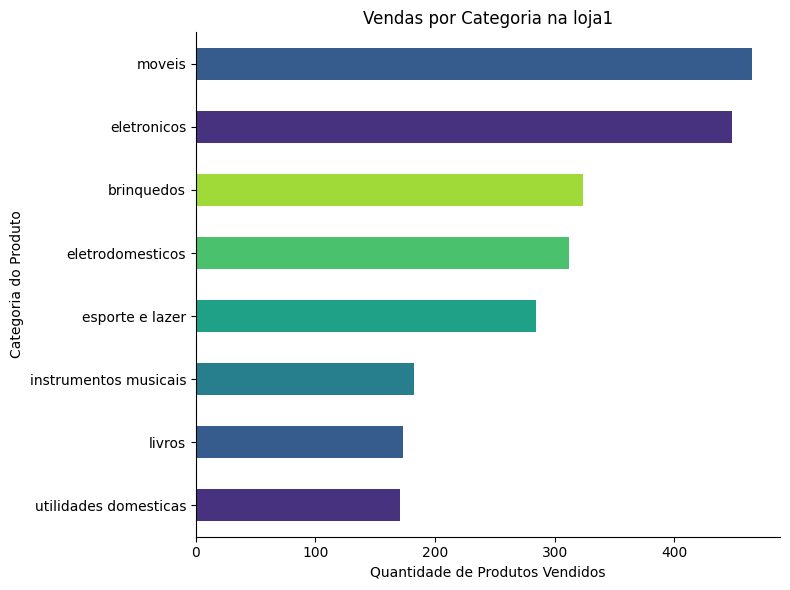

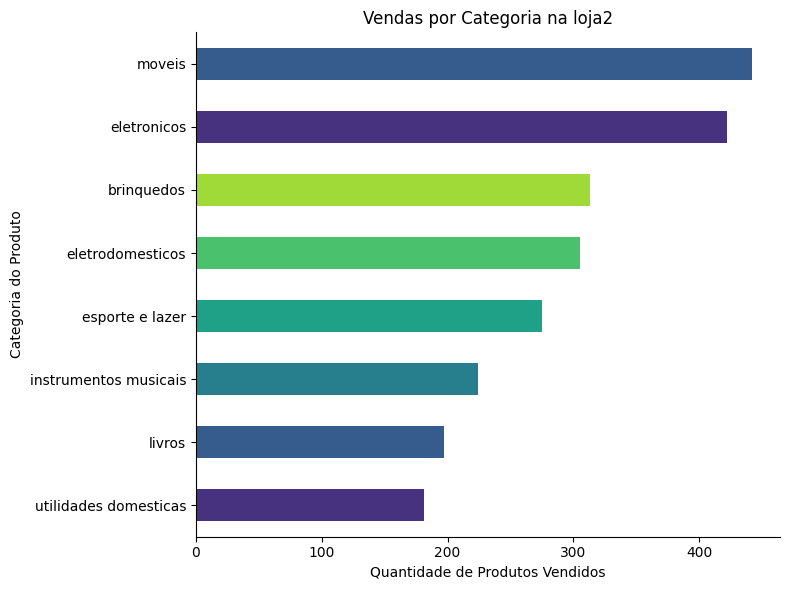

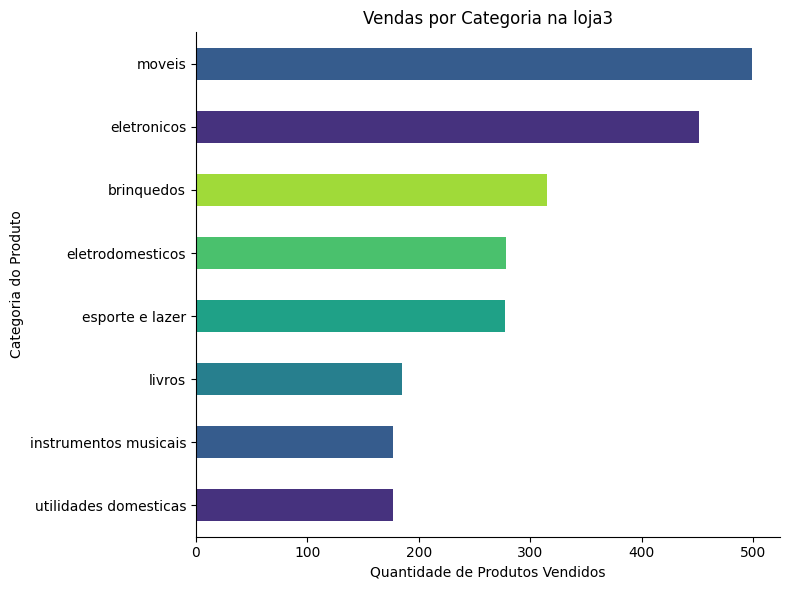

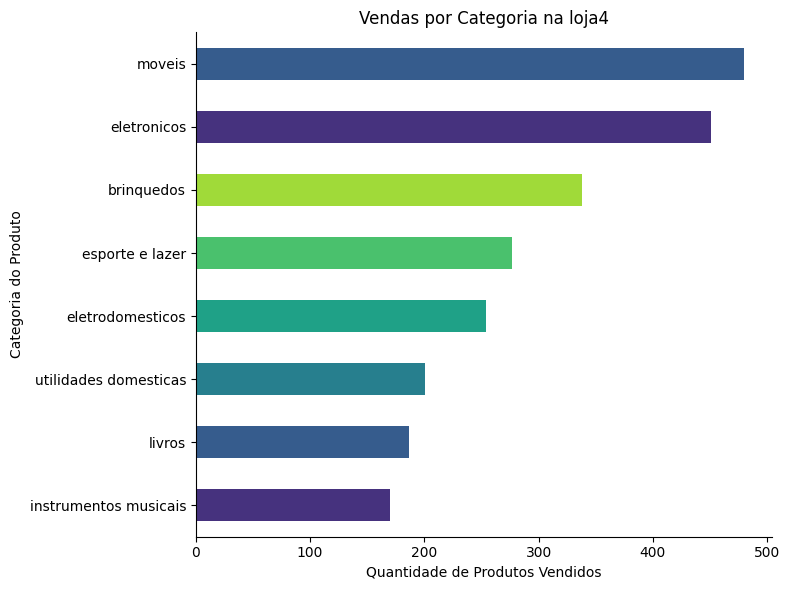

In [ ]:
#calcular a quantidade de produtos vendidos por categoria em cada loja. A ideia é agrupar os dados por categoria e contar o número de vendas de cada tipo, mostrando as categoria mais populares de cada loja

# Criar uma lista de DataFrames para iterar
lojas = [loja, loja2, loja3, loja4]
#sta lista armazena os nomes correspondentes das lojas ('loja1', 'loja2', 'loja3', 'loja4'). Esses nomes serão usados para imprimir os resultados.
nomes_lojas = ['loja1', 'loja2', 'loja3', 'loja4']
# Lista para armazenar os dados dos gráficos
dados_graficos = []

# Iterar pelas lojas
#enumerate é usado para obter o índice (i) e o DataFrame (loja_df) para cada loja. Isso permite que o código referencie o nome da loja usando o índice i na lista nomes_lojas
for i, loja_df in enumerate(lojas): #Dentro do loop, esta linha calcula o número de produtos vendidos em cada categoria para a loja atual (loja_df)
#groupby('Categoria do Produto') agrupa os dados pela coluna 'Categoria do Produto
  vendas_por_categoria = loja_df.groupby('Categoria do Produto').size() #size() conta o número de itens em cada grupo, efetivamente fornecendo a contagem de vendas para cada categoria
#O resultado é armazenado em uma variável chamada vendas_por_categoria
  print(f'\nVendas por categoria na {nomes_lojas[i]}') #imprime um cabeçalho indicando o nome da loja
#imprime os dados de vendas calculados para cada categoria na loja
  print(vendas_por_categoria)

# Encontrar a categoria mais vendida
#encontra a categoria com a maior contagem de vendas usando idxmax() e a armazena em categoria_mais_vendida
  categoria_mais_vendida = vendas_por_categoria.idxmax()
#btém a contagem real de vendas para a categoria mais popular usando max() e a armazena em quantidade_categoria_mais_vendida
  quantidade_categoria_mais_vendida = vendas_por_categoria.max()
#imprime a categoria mais popular e sua contagem de vendas para a loja atual
  print(f'\nA categoria mais vendida na {nomes_lojas[i]} é {categoria_mais_vendida} com {quantidade_categoria_mais_vendida} vendas.')

  # Armazenar os dados do gráfico em um dicionário
  dados_graficos.append({
      'nome_loja': nomes_lojas[i],
      'vendas_por_categoria': vendas_por_categoria
    })

# Criar e exibir os gráficos horizontais fora do loop
for dados in dados_graficos:
    plt.figure(figsize=(8, 6))  # Ajustar o tamanho da figura

    # Ordenar as categorias por quantidade de vendas em ordem crescente
    dados['vendas_por_categoria'] = dados['vendas_por_categoria'].sort_values(ascending=True)

    # Criar o gráfico de barras horizontais
    dados['vendas_por_categoria'].plot(kind='barh', color=sns.color_palette("viridis"))

    plt.title(f'Vendas por Categoria na {dados["nome_loja"]}')
    plt.xlabel('Quantidade de Produtos Vendidos')
    plt.ylabel('Categoria do Produto')

    # Remover as bordas superior e direita do gráfico
    sns.despine()

    plt.tight_layout()
    plt.show()






# 3. Média de Avaliação das Lojas


Média de avaliações na loja1: 3.98

Média de avaliações na loja2: 4.04

Média de avaliações na loja3: 4.05

Média de avaliações na loja4: 4.00


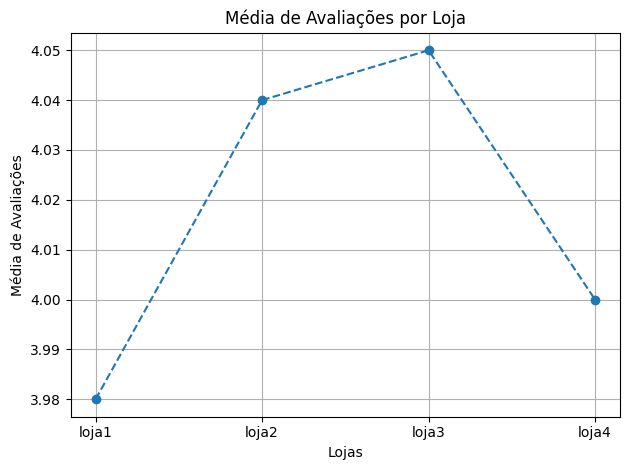

In [ ]:
#calcular a média das avaliações dos clientes para cada loja. O objetivo é entender a satisfação dos clientes com os produtos vendidos

# Lista para armazenar as médias de cada loja
medias_lojas = []

#enumerate é usado para obter o índice (i) e o DataFrame (loja_df) para cada loja. Isso permite que o código referencie o nome da loja usando o índice i na lista nomes_lojas
for i, loja_df in enumerate(lojas):
  # Calcula a média das avaliações para a loja atual
  #loja_df['Avaliação da compra'] seleciona a coluna 'Avaliação da compra
  media_avaliacoes = loja_df['Avaliação da compra'].mean() #.mean() calcula a média dos valores presentes nessa coluna
  media_avaliacoes = round(media_avaliacoes, 2) # Arredondar a média para duas casas decimais
  medias_lojas.append(media_avaliacoes) # Armazena a média na lista
  print(f'\nMédia de avaliações na {nomes_lojas[i]}: {media_avaliacoes:.2f}') #imprime a média das avaliações para a loja atual

# Criando o gráfico de linha
plt.plot(nomes_lojas, medias_lojas, marker='o', linestyle='--')
plt.title('Média de Avaliações por Loja')
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliações')
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.tight_layout()
plt.show()



# 4. Produtos Mais e Menos Vendidos

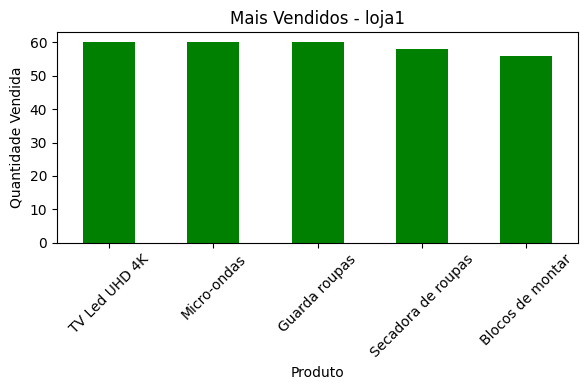


Produtos mais vendidos na loja1:
Produto
TV Led UHD 4K         60
Micro-ondas           60
Guarda roupas         60
Secadora de roupas    58
Blocos de montar      56
Name: Preço, dtype: int64


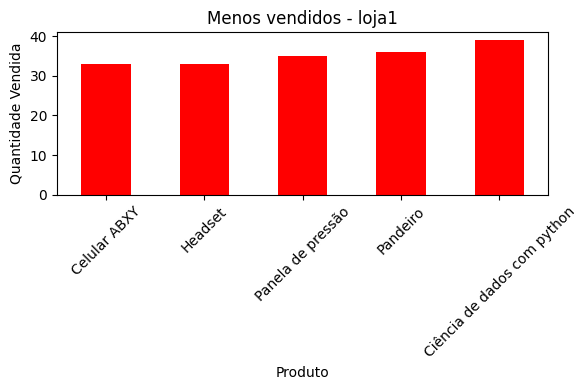


Produtos menos vendidos na loja1:
Produto
Celular ABXY                   33
Headset                        33
Panela de pressão              35
Pandeiro                       36
Ciência de dados com python    39
Name: Preço, dtype: int64


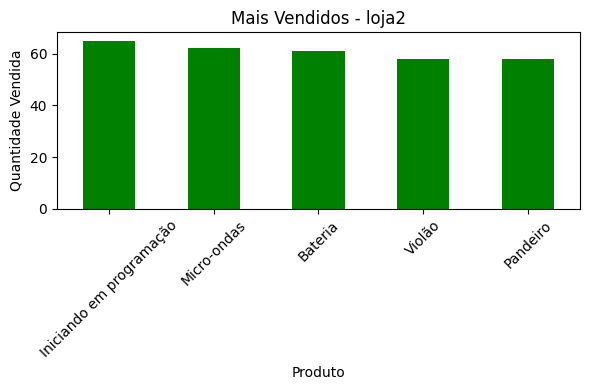


Produtos mais vendidos na loja2:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: Preço, dtype: int64


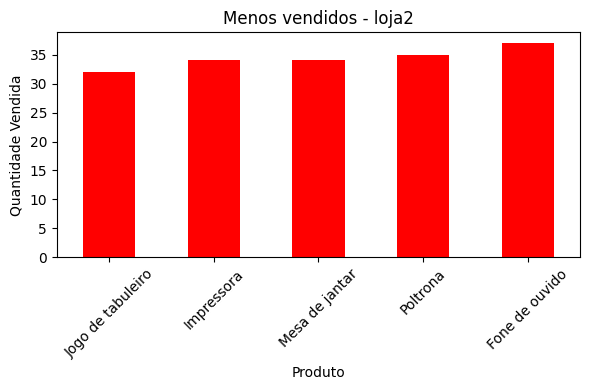


Produtos menos vendidos na loja2:
Produto
Jogo de tabuleiro    32
Impressora           34
Mesa de jantar       34
Poltrona             35
Fone de ouvido       37
Name: Preço, dtype: int64


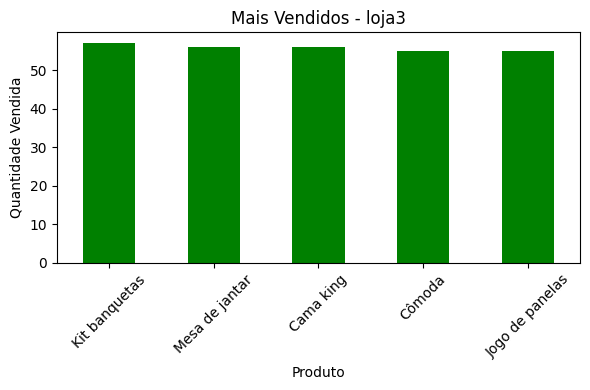


Produtos mais vendidos na loja3:
Produto
Kit banquetas      57
Mesa de jantar     56
Cama king          56
Cômoda             55
Jogo de panelas    55
Name: Preço, dtype: int64


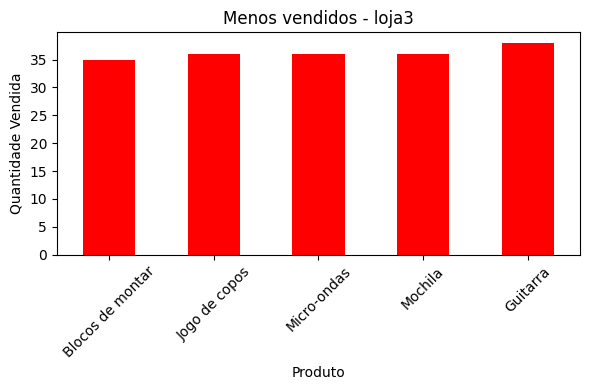


Produtos menos vendidos na loja3:
Produto
Blocos de montar    35
Jogo de copos       36
Micro-ondas         36
Mochila             36
Guitarra            38
Name: Preço, dtype: int64


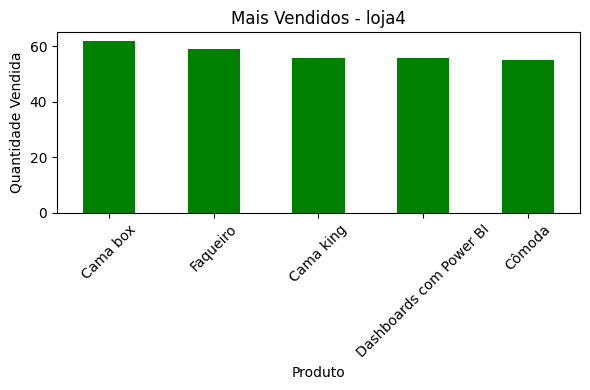


Produtos mais vendidos na loja4:
Produto
Cama box                   62
Faqueiro                   59
Cama king                  56
Dashboards com Power BI    56
Cômoda                     55
Name: Preço, dtype: int64


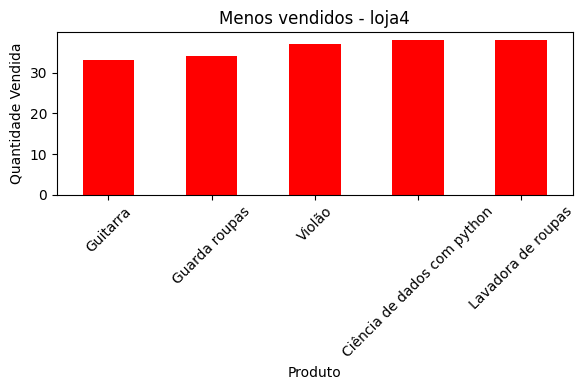


Produtos menos vendidos na loja4:
Produto
Guitarra                       33
Guarda roupas                  34
Violão                         37
Ciência de dados com python    38
Lavadora de roupas             38
Name: Preço, dtype: int64


In [ ]:
# identificar quais produtos foram os mais vendidos e os menos vendidos em cada loja. Ao final, visualize os resultados de forma que fique claro quais produtos se destacaram nas vendas de cada loja

# Produtos Mais e Menos Vendidos
for i, loja_df in enumerate(lojas):
    # Agrupa por produto e soma a quantidade vendida
    vendas_por_produto = loja_df.groupby('Produto')['Preço'].count()

    # Ordena as vendas de forma decrescente para identificar os mais vendidos
    produtos_mais_vendidos = vendas_por_produto.sort_values(ascending=False)
    # Ordena as vendas de forma crescente para identificar os menos vendidos
    produtos_menos_vendidos = vendas_por_produto.sort_values(ascending=True)

    #gerar gráfico tipo coluna dos mais vendidos
    plt.figure(figsize=(6, 4))
    produtos_mais_vendidos.head(5).plot(kind='bar', color='green')
    plt.title(f'Mais Vendidos - {nomes_lojas[i]}')
    plt.xlabel('Produto')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f'\nProdutos mais vendidos na {nomes_lojas[i]}:')
    print(produtos_mais_vendidos.head(5)) # Exibe os 5 mais vendidos

    #gerar gráfico tipo coluna dos menos vendidos
    plt.figure(figsize=(6, 4))
    produtos_menos_vendidos.head(5).plot(kind='bar', color='red')
    plt.title(f'Menos vendidos - {nomes_lojas[i]}')
    plt.xlabel('Produto')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f'\nProdutos menos vendidos na {nomes_lojas[i]}:')
    print(produtos_menos_vendidos.head(5)) # Exibe os 5 menos vendidos






# 5. Frete Médio por Loja



Frete médio na loja1: R$34,69

Frete médio na loja2: R$33,62

Frete médio na loja3: R$33,07

Frete médio na loja4: R$31,28


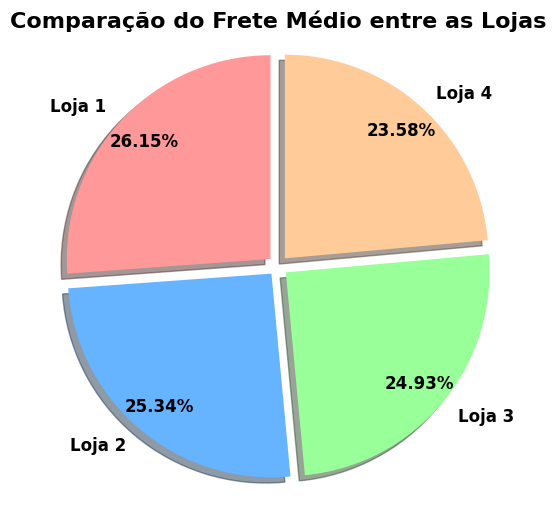

In [ ]:
#calcular o custo médio de frete para cada loja. O objetivo é entender quanto, em média, está sendo gasto com frete para cada uma das lojas
# Calcular o frete médio para cada loja
fretes_medios = []
for i, loja_df in enumerate(lojas):
    frete_medio = loja_df['Frete'].mean()
    fretes_medios.append(frete_medio)
    print(f'\nFrete médio na {nomes_lojas[i]}: R${frete_medio:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))


# Criar o gráfico de pizza
labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'] # Define cores personalizadas
explode = (0.05, 0.05, 0.05, 0.05)  # Explode todas as fatias
plt.figure(figsize=(6, 6))  # Ajusta o tamanho da figura para melhor visibilidade
plt.pie(fretes_medios, labels=labels, colors=colors, explode=explode, autopct='%1.2f%%', startangle=90,
        shadow=True, pctdistance=0.85, textprops={'fontsize': 12, 'weight': 'bold'}) # Aprimoramentos
plt.title('Comparação do Frete Médio entre as Lojas', fontsize=16, fontweight='bold')  # Estiliza o título
plt.axis('equal')  #garante que seja um circulo
plt.show()
